In [3]:
# Re-imports after a restart
import sys, os, importlib
sys.path.append(os.path.abspath(".."))  # make ../src visible

import pandas as pd
import matplotlib.pyplot as plt

# Re-import project modules
from src import data as data_mod, features as features_mod, utils as utils_mod
importlib.reload(data_mod)
importlib.reload(features_mod)
importlib.reload(utils_mod)

from src.data import get_data
from src.features import add_features
from src.utils import make_labels


In [4]:
df = get_data("AAPL", start="2015-01-01", end="2023-12-31")
print("Raw data shape:", df.shape)
print(df.columns.tolist())
df.head()


Raw data shape: (2264, 6)
['date', 'open', 'high', 'low', 'close', 'volume']


,date,open,high,low,close,volume
0,2015-01-02,24.718178,24.729274,23.821675,24.261051,212818400
1,2015-01-05,24.030260,24.110146,23.391169,23.577570,257142000
2,2015-01-06,23.641929,23.839426,23.218087,23.579796,263188400
3,2015-01-07,23.788385,24.010292,23.677432,23.910435,160423600
4,2015-01-08,24.238858,24.886824,24.121246,24.829128,237458000


In [5]:
df = add_features(df)
print("With features shape:", df.shape)
df.head()


With features shape: (2231, 14)


,date,open,high,low,close,volume,ret1,ret5,ret10,vol10,volz,rsi14,macd,macd_signal
0,2015-02-20,28.654271,28.850321,28.527287,28.850321,195793600,0.008175,0.024039,0.079706,0.009271,-0.593114,78.737087,1.055489,0.908930
1,2015-02-23,28.966157,29.630047,28.885955,29.630047,283896400,0.027027,0.046584,0.118305,0.009183,0.227530,82.379017,1.123914,0.951927
2,2015-02-24,29.616684,29.763721,29.222359,29.445141,276912400,-0.006240,0.033951,0.103993,0.010687,0.131432,78.926580,1.149965,0.991534
3,2015-02-25,29.309249,29.318162,28.549560,28.692141,298846800,-0.025573,0.000544,0.055483,0.014934,0.406392,66.672405,1.097201,1.012668
4,2015-02-26,28.692142,29.155530,28.206478,29.055279,365150000,0.012656,0.015337,0.044363,0.013846,1.801402,69.159242,1.072327,1.024600


In [6]:
df = make_labels(df, tau=0.0)
print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (2230, 16)


,date,open,high,low,close,volume,ret1,ret5,ret10,vol10,volz,rsi14,macd,macd_signal,ret_next,y
0,2015-02-20,28.654271,28.850321,28.527287,28.850321,195793600,0.008175,0.024039,0.079706,0.009271,-0.593114,78.737087,1.055489,0.908930,0.027027,1
1,2015-02-23,28.966157,29.630047,28.885955,29.630047,283896400,0.027027,0.046584,0.118305,0.009183,0.227530,82.379017,1.123914,0.951927,-0.006240,0
2,2015-02-24,29.616684,29.763721,29.222359,29.445141,276912400,-0.006240,0.033951,0.103993,0.010687,0.131432,78.926580,1.149965,0.991534,-0.025573,0
3,2015-02-25,29.309249,29.318162,28.549560,28.692141,298846800,-0.025573,0.000544,0.055483,0.014934,0.406392,66.672405,1.097201,1.012668,0.012656,1
4,2015-02-26,28.692142,29.155530,28.206478,29.055279,365150000,0.012656,0.015337,0.044363,0.013846,1.801402,69.159242,1.072327,1.024600,-0.015028,0


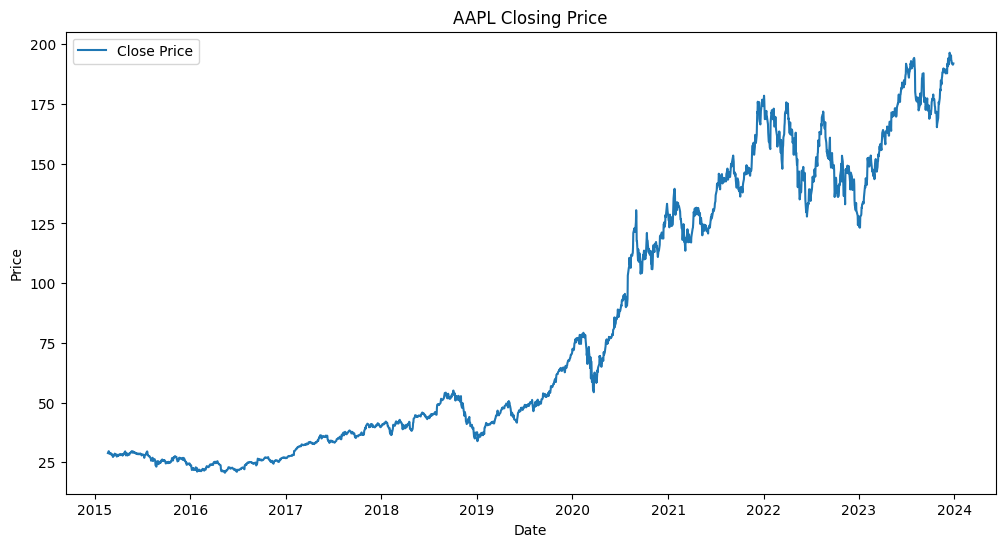

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], label="Close Price")
plt.title("AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [8]:
print("Label distribution (0=down, 1=up):")
df["y"].value_counts(normalize=True)


Label distribution (0=down, 1=up):


y
1    0.526009
0    0.473991
Name: proportion, dtype: float64